In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('ev_data.csv', index_col = 0).dropna()
energy = pd.read_csv('energy_production.csv', index_col = 0).dropna()
charging = pd.read_csv("charging_stations.csv", index_col = 0).dropna()

In [11]:
data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [25]:
data_cleaned = data.drop(columns = ["category", "mode"])
data_cleaned["powertrain"].unique()

array(['EV', 'BEV', 'PHEV', 'FCEV'], dtype=object)

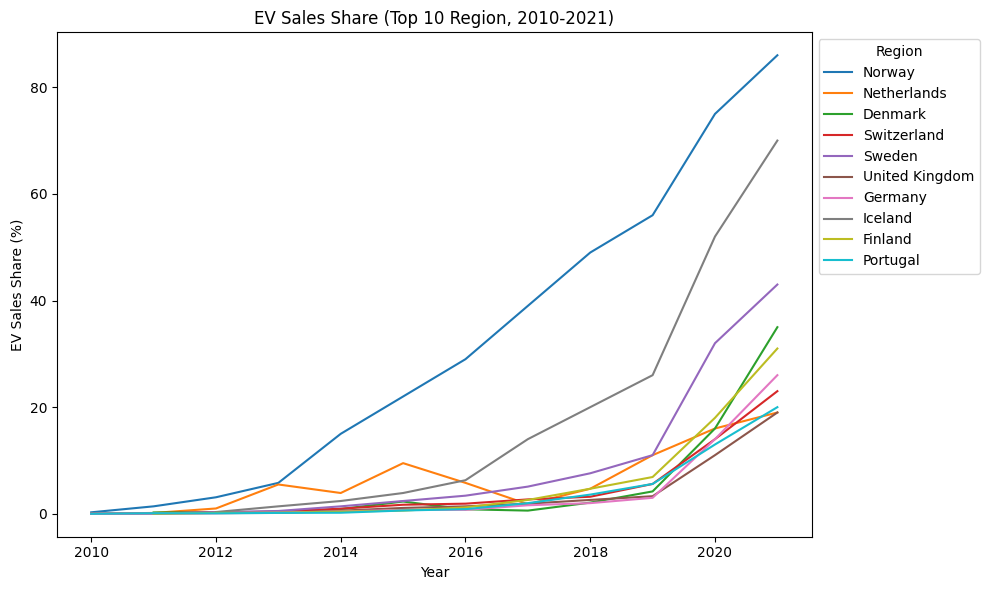

In [12]:
# EV Sales Share by Region
data_summary = data[data["parameter"] == "EV sales share"]
data_summary = data_summary.groupby(["region", "year", "parameter"]).sum("value")
data_summary = data_summary.reset_index().sort_values("year", ascending = False)
data_summary = data_summary.drop(columns=['parameter'])

total_sales_share = data_summary.groupby("region")["value"].sum().reset_index()

top_10_countries = total_sales_share.sort_values("value", ascending=False).head(10)
top_10_regions = top_10_countries["region"].unique()

filtered_data_summary = data_summary[data_summary["region"].isin(top_10_regions)]

plt.figure(figsize=(10, 6))

for region in filtered_data_summary["region"].unique():
    regions = filtered_data_summary[filtered_data_summary["region"] == region]
    plt.plot(regions["year"], regions["value"], label=region)

plt.xlabel("Year")
plt.ylabel("EV Sales Share (%)")
plt.title("EV Sales Share (Top 10 Region, 2010-2021)")
plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

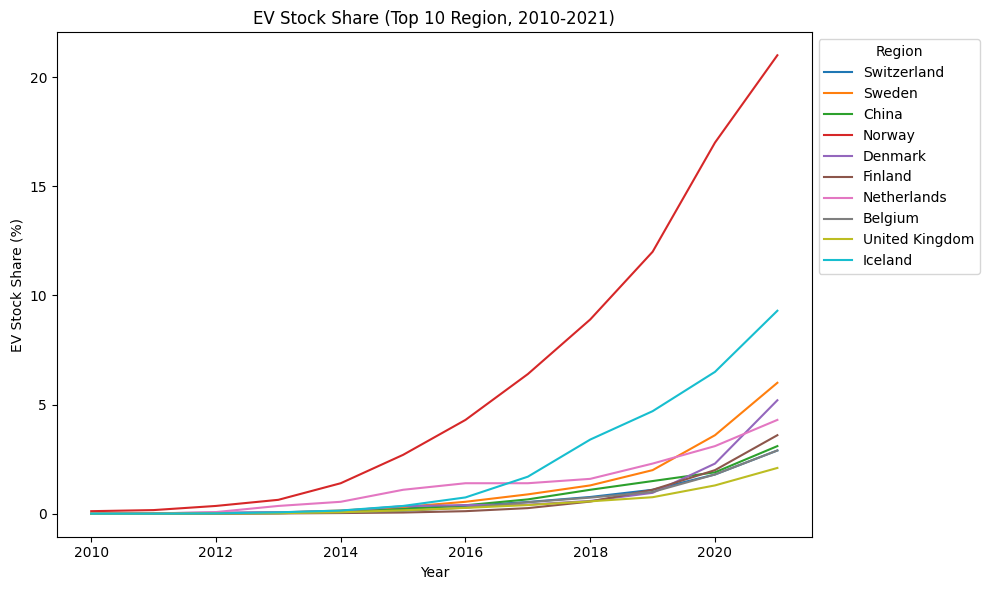

In [13]:
# EV Stock Share by Region
data_summary = data[data["parameter"] == "EV stock share"]
data_summary = data_summary.groupby(["region", "year", "parameter"]).sum("value")
data_summary = data_summary.reset_index().sort_values("year", ascending = False)
data_summary = data_summary.drop(columns=['parameter'])

total_stock_share = data_summary.groupby("region")["value"].sum().reset_index()

top_10_countries = total_stock_share.sort_values("value", ascending=False).head(10)
top_10_regions = top_10_countries["region"].unique()

filtered_data_summary = data_summary[data_summary["region"].isin(top_10_regions)]

plt.figure(figsize=(10, 6))

for region in filtered_data_summary["region"].unique():
    regions = filtered_data_summary[filtered_data_summary["region"] == region]
    plt.plot(regions["year"], regions["value"], label=region)

plt.xlabel("Year")
plt.ylabel("EV Stock Share (%)")
plt.title("EV Stock Share (Top 10 Region, 2010-2021)")
plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


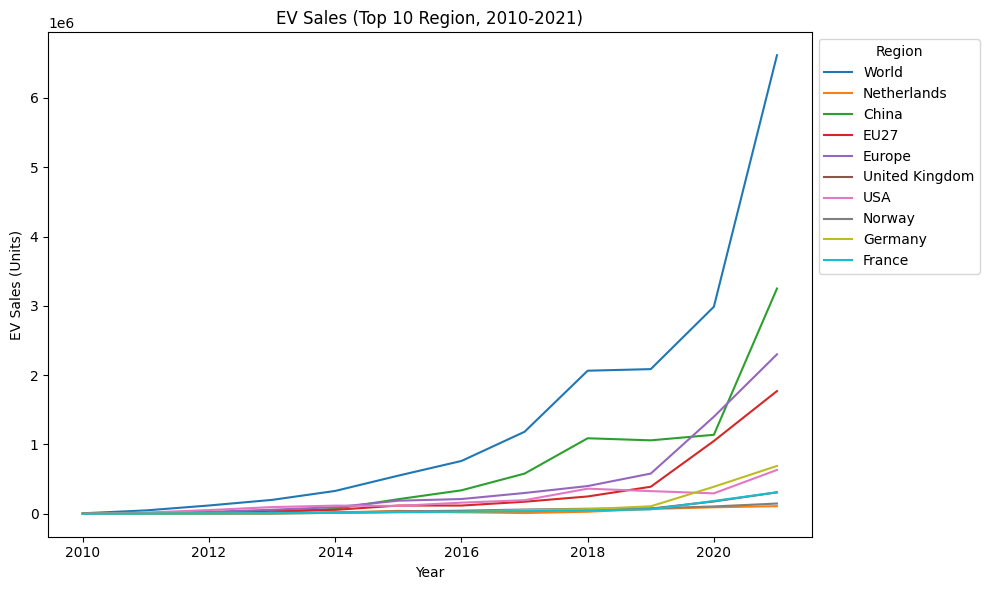

In [14]:
# EV Sales by Region
data_summary = data[data["parameter"] == "EV sales"]
data_summary = data_summary.groupby(["region", "year", "parameter"]).sum("value")
data_summary = data_summary.reset_index().sort_values("year", ascending = False)
data_summary = data_summary.drop(columns=['parameter'])

total_sales = data_summary.groupby("region")["value"].sum().reset_index()

top_10_countries = total_sales.sort_values("value", ascending=False).head(10)
top_10_regions = top_10_countries["region"].unique()

filtered_data_summary = data_summary[data_summary["region"].isin(top_10_regions)]

plt.figure(figsize=(10, 6))

for region in filtered_data_summary["region"].unique():
    regions = filtered_data_summary[filtered_data_summary["region"] == region]
    plt.plot(regions["year"], regions["value"], label=region)

plt.xlabel("Year")
plt.ylabel("EV Sales (Units)")
plt.title("EV Sales (Top 10 Region, 2010-2021)")
plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

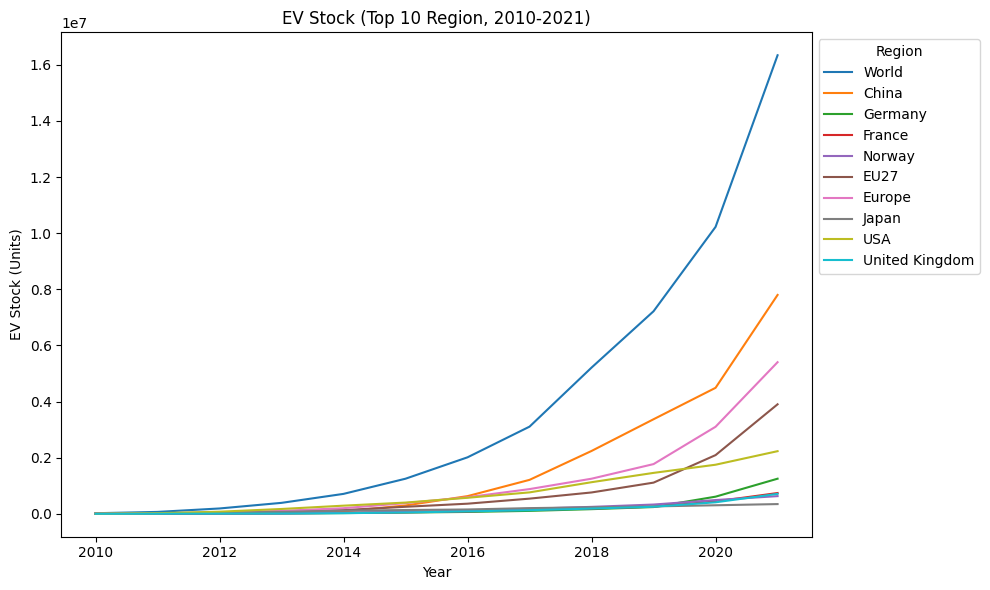

In [20]:
# EV Stock by Region
data_summary = data[data["parameter"] == "EV stock"]
data_summary = data_summary.groupby(["region", "year", "parameter"]).sum("value")
data_summary = data_summary.reset_index().sort_values("year", ascending = False)
data_summary = data_summary.drop(columns=['parameter'])

total_stock = data_summary.groupby("region")["value"].sum().reset_index()

top_10_countries = total_stock.sort_values("value", ascending=False).head(10)
top_10_regions = top_10_countries["region"].unique()

filtered_data_summary = data_summary[data_summary["region"].isin(top_10_regions)]

plt.figure(figsize=(10, 6))

for region in filtered_data_summary["region"].unique():
    regions = filtered_data_summary[filtered_data_summary["region"] == region]
    plt.plot(regions["year"], regions["value"], label=region)

plt.xlabel("Year")
plt.ylabel("EV Stock (Units)")
plt.title("EV Stock (Top 10 Region, 2010-2021)")
plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [16]:
energy.head()
energy = energy.drop(columns=["Unit"])

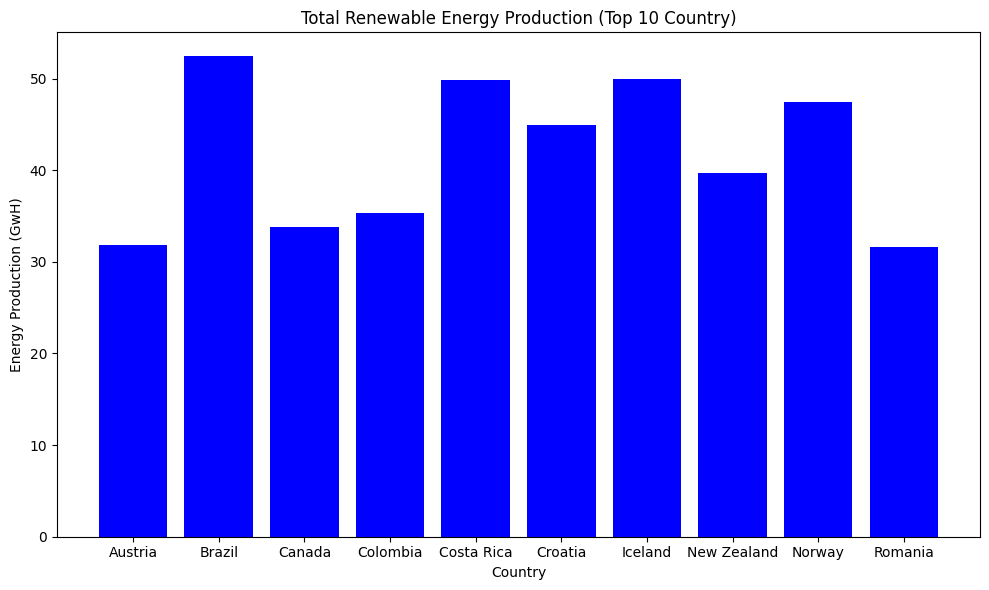

In [17]:
# Display the Total Percentage of Net Renewable Energy Production in the Top 10 Country
energy_summary = energy[energy["Balance"] == "Net Electricity Production"]
energy_summary = energy.groupby(["Country", "Balance", "Product"]).sum("Value")
energy_summary = energy_summary.reset_index()

product_category = {
    'Electricity': 'Total Non-Renewable',
    'Nuclear': 'Total Non-Renewable',
    'Total Combustible Fuels': 'Total Non-Renewable',
    'Coal, Peat and Manufactured Gases': 'Total Non-Renewable',
    'Oil and Petroleum Products': 'Total Non-Renewable',
    'Natural Gas': 'Total Non-Renewable',
    'Combustible Renewables': 'Total Renewable',
    'Other Combustible Non-Renewables': 'Total Non-Renewable',
    'Hydro': 'Total Renewable',
    'Wind': 'Total Renewable',
    'Solar': 'Total Renewable',
    'Geothermal': 'Total Renewable',
    'Other Renewables': 'Total Renewable',
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)': 'Total Renewable',
    'Not Specified': 'Not Specified'
}

energy_summary['Category'] = energy_summary['Product'].map(product_category)
energy_grouped = energy_summary.groupby(['Country', 'Category'])['Value'].sum().reset_index()
energy_grouped_pivot = energy_grouped.pivot(index=['Country'], columns='Category', values='Value').reset_index().fillna(0)
energy_grouped_pivot["Renewable Percentage"] = energy_grouped_pivot["Total Renewable"] / (energy_grouped_pivot["Total Renewable"] + energy_grouped_pivot["Total Non-Renewable"] + energy_grouped_pivot["Not Specified"]) * 100

top_10_countries = energy_grouped_pivot.sort_values("Renewable Percentage", ascending=False).head(10)
top_10_countries = top_10_countries["Country"].unique()

filtered_energy_grouped_pivot = energy_grouped_pivot[energy_grouped_pivot["Country"].isin(top_10_countries)]

plt.figure(figsize=(10, 6))

for country in filtered_energy_grouped_pivot["Country"].unique():
    plt.bar(filtered_energy_grouped_pivot["Country"], filtered_energy_grouped_pivot["Renewable Percentage"], label = "Renewable Percentage", color = "blue")

plt.xlabel("Country")
plt.ylabel("Energy Production (GwH)")
plt.title("Total Renewable Energy Production (Top 10 Country)")
plt.tight_layout()
plt.show()

In [18]:
charging.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV charging points,EV,Publicly available fast,2017,charging points,40.0
1,Australia,Historical,EV charging points,EV,Publicly available slow,2017,charging points,440.0
2,Australia,Historical,EV charging points,EV,Publicly available fast,2018,charging points,61.0
3,Australia,Historical,EV charging points,EV,Publicly available slow,2018,charging points,670.0
4,Australia,Historical,EV charging points,EV,Publicly available slow,2019,charging points,1700.0


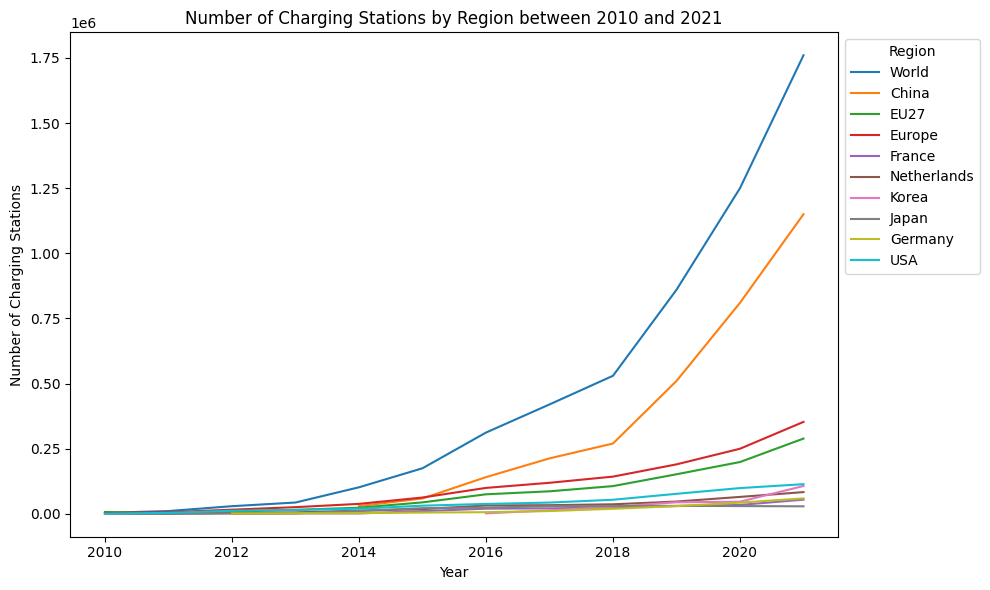

In [22]:
# Total charging stations by region
country_stations = charging.groupby(["region", "year"]).sum("value")
country_stations = country_stations.reset_index().sort_values("year", ascending = False)
total_charging_points = country_stations.groupby("region")["value"].sum().reset_index()

top_10_countries = total_charging_points.sort_values("value", ascending=False).head(10)
top_10_regions = top_10_countries["region"].unique()

filtered_stations_summary = country_stations[country_stations["region"].isin(top_10_regions)]

plt.figure(figsize=(10, 6))

for region in filtered_stations_summary["region"].unique():
        regions = filtered_stations_summary[filtered_stations_summary["region"] == region]
        plt.plot(regions["year"], regions["value"], label = region)

plt.xlabel("Year")
plt.ylabel("Number of Charging Stations")
plt.title("Number of Charging Stations by Region between 2010 and 2021")
plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()